Temas de examen:
- Introduccion a python:

   - Variables
   - Operadores

- Estructuras de control:

   - if-else (elif)
   - while (break)
   - for-in
   - random
   - def funtion, return, yield
   - Recursion (memoizacion)
- Errores numericos:
   
   - $E_{tot} = E_{num} + E_{APF}$, (APF=aritmetica de punto flotante)



*** Duferentes métodos para Raices:***


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Solucion de ecuacioes no lineales:
# - Metodo "Incremental search"
# - Biseccion
# - Newton-Rhapson
# - Secante
# - Ridders

# Sea:
# f(x)= 0, con x_0, x_1,...,x_n = c +- epsilon.

In [ ]:
# Metodo "Incremental search":

# Vamos a encontrar raices:

def f(x):
  return x**3-10*x**2+5 #Definimos una funcion f
def incremental(g,x0,h): #Definimos x0 y h como varibles de la funcion "incremental"
  x1=x0+h #Definimos la variable x1 en funcion de variables ya definidas
  i=0 #Cuenta los pasos que hace colab para ejecutar el comando
  while g(x0)*g(x1)>0: #Mientras no encuentras la raiz, ie, es positivo, muestras:
    x0=x1
    x1=x0+h
    i+=1
  return x1,i #Este ciclo nos devuelve x1 y los pasos que hace colab para ejecutar
print(incremental(f,0,0.0001)) #definimos g=f, x0=0, h=0.0001 y nos devuelve la funcion "incremental", ie, la funcion f y el intervalo definido


(0.7346999999999354, 7346)


In [ ]:
#Otra forma del metodo incremental
def incremental(f,a,b,dx): #funcion,intervalo,dx
    x0=a; f0=f(x0)
    x1=x0+dx; f1=f(x1)
    contador=0.0
    while f0*f1>0.0: #parametro de fineza del metodo
        if x1>=b: return ('No hay raíz en este intervalo') #salgo del bucle infinito
        x0=x1; f0=f1
        x1=x0+dx; f1=f(x1)
        contador=contador+1
    return [x1,contador]

In [ ]:
#Metodo biseccion

def f(x):
  return x**3-10*x**2+5 #Definimos la funcion f
def biseccion(g,a,b,precision=1e-6): #Definimos una funcion con variables definidas, con un intervalo donde queremos que colab pare
  c=(a+b)/2
  i=0 #Cuanta los pasos que hace colab para ejecutar
  tol=2 #Ponemos un limite de tolerancia para que colab ejecute el codigo
  while tol>precision:
      if f(a)*f(c)<0:
        b=c
      elif f(c)*f(b)<0:
        a=c
      c=(a+b)/2
      i+=1
      tol=tol/2 #Dividimos entre dos, pues siempre partimos el intervalo a la mitad
  return c,i
print(biseccion(f,0,0.8)) #Definimos g=f, y el intervalo (a,b)


(0.7346036911010743, 21)


[-4, -27, -58, -91, -120, -123, 5, 512]


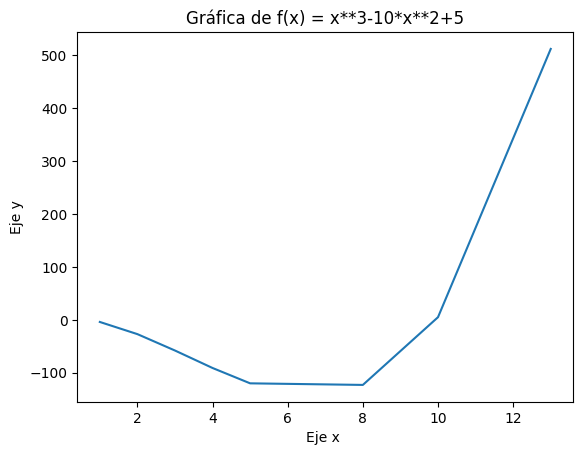

In [ ]:
x=[1, 2, 3, 4,5,8,10,13]

#Ahora trabajeremos con una función cuadrática que tiene una complejidad ligeramente superior. Las líneas siguietes, comentadas son la manera en la que podráimos obtener el array y.

y = []
for i in x:
  y.append(i**3-10*(i**2)+5)
print(y)

y = [-4,-27,-58,-91,-120,-123,5,512]
plt.plot(x,y)
plt.xlabel('Eje x ')
plt.ylabel('Eje y')
plt.title('Gráfica de f(x) = x**3-10*x**2+5')
plt.show()

In [ ]:
import pandas as pd #De pandas, importamos pd
lista_incremental=[]
idx=[]
valor_real=0.73460351
for i in range(1,7): #Definimos el rango
  idx.append(10**(-i))
  raiz=incremental(f,0,10**(-i))
  error=(abs(valor_real-raiz[0])/valor_real**100)
  lista_incremental.append([raiz[0],raiz[1],error])
cols=['Raiz','Pasos','Error %']
pd.DataFrame(lista_incremental,index=idx,columns=cols)

,Raiz,Pasos,Error %
0.100000,0.800000,7,1.622761e+12
0.010000,0.740000,73,1.339095e+11
0.001000,0.735000,734,9.838578e+09
0.000100,0.734700,7346,2.394321e+09
0.000010,0.734610,73460,1.610441e+08
0.000001,0.734604,734603,1.215896e+07


In [ ]:
#Otra forma del metodo de biseccion

def biseccion(f,a,b,epsilon=1e-6):
    contador=0
    dx=abs(b-a)
    while dx>epsilon:
        x=(a+b)/2.0
        if (f(a)*f(x))<0:
            b=x #izquierda #la raiz estaria entre a y el punto medio
        elif (f(x)*f(b))<0:
            a=x #derecha #la raiz estaria entre el punto medio y b
        else:
            dx=epsilon/2
            print('El intervalo no tiene raíz')
        dx=abs(b-a) #renombrar el intervalo
        contador=contador+1
    return[x,contador]

In [ ]:
#Metodo de la secante
import numpy as np
def secante(f, x0, x1, delta=1e-9):
    contador= 0
    dx = delta*2
    while dx> delta:  #and contador<1000 :
        x = x1 -f(x1)*((x1-x0)/(f(x1) -f(x0)))
        dx = abs(x1-x)
        x1 = x
        contador +=1
        res = x
    return [res,contador]

In [ ]:
#Metodo de Ridders

def ridders(f,x1,x2,tol=1e-9):
    n=0 #este es el contador
    f1=f(x1)
    if f1==0: return x1
    f2=f(x2)
    if f2==0: return x2
   # if f1*f2>0.0: return np.nan #intervalos correctos
    while abs(x1-x2)> tol:
        x3=0.5*(x1+x2);f3=f(x3)
        raiz=sqrt(f3**2.-f1*f2)
        if raiz==0:return None
        fraccion=(x3-x1)*f3/raiz
        if (f1-f2)<0.0: fraccion=-fraccion #creciente
        x4=x3+fraccion; f4=f(x4)
        if (f3*f4)>0.0: #decreciente
            if f1*f4>0.0:x1=x3;f1=f3
            else: x2=x3;f2=f3
        else:
            x1=x3;x2=x4;f1=f3;f2=f4
        n+=1
    return [x4,n]

In [ ]:
#Metodo Newton Rhapson
# Este metodo solo funciona para funciones continuas y derivables.

def newton(f,df,x,epsilon=1e-6): #funcion,derivada,punto
    dx=2*epsilon
    contador=0
    while dx>epsilon and contador<1000:
        x1=x-f(x)/df(x)
        dx=abs(x-x1)
        x=x1
        contador=contador+1

    return [x,contador]
